# Customer Churn Prediction for Telecom
**Industry:** Telecommunications  
**Dataset:** Telco Customer Churn (Kaggle)  
**Tools:** Python, Pandas, Scikit-learn, Matplotlib, Seaborn

---

##  Step 1: Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

print(' All libraries imported successfully!')

✅ All libraries imported successfully!


##  Step 2: Load Dataset

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print('Shape:', df.shape)
print('\nColumn Names:')
print(df.columns.tolist())
df.head()

Shape: (7043, 21)

Column Names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##  Step 3: Clean Data

In [6]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values
df.dropna(inplace=True)

# Drop customerID
df.drop('customerID', axis=1, inplace=True)

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print('Data cleaned!')
print('Shape after cleaning:', df.shape)
print('Missing values:', df.isnull().sum().sum())

Data cleaned!
Shape after cleaning: (7032, 20)
Missing values: 0


In [7]:
# One-hot encoding for categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print('Categorical columns:', categorical_cols)

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print('\n Encoding done! New shape:', df_encoded.shape)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

 Encoding done! New shape: (7032, 31)


## Step 4: Exploratory Data Analysis (EDA)

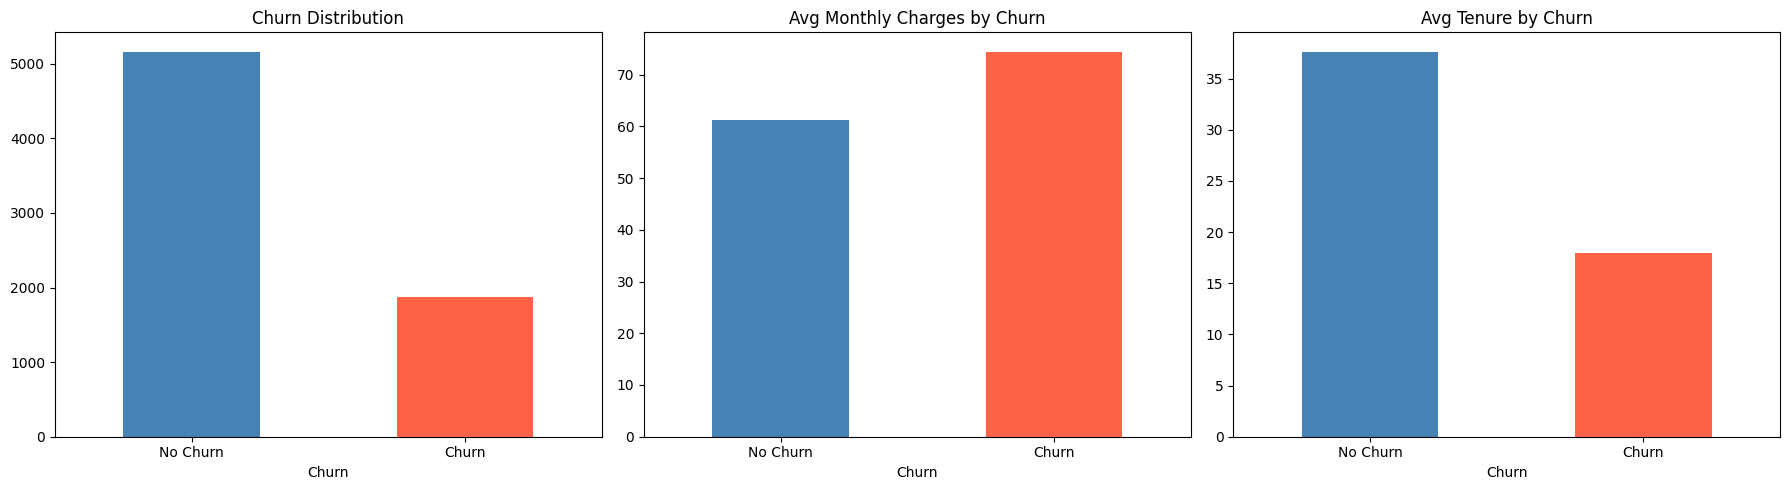

 EDA plots done!


In [8]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Churn Distribution
df['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue', 'tomato'])
axes[0].set_title('Churn Distribution')
axes[0].set_xticklabels(['No Churn', 'Churn'], rotation=0)

# Monthly Charges by Churn
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar', ax=axes[1], color=['steelblue', 'tomato'])
axes[1].set_title('Avg Monthly Charges by Churn')
axes[1].set_xticklabels(['No Churn', 'Churn'], rotation=0)

# Tenure by Churn
df.groupby('Churn')['tenure'].mean().plot(kind='bar', ax=axes[2], color=['steelblue', 'tomato'])
axes[2].set_title('Avg Tenure by Churn')
axes[2].set_xticklabels(['No Churn', 'Churn'], rotation=0)

plt.tight_layout()
plt.show()
print(' EDA plots done!')

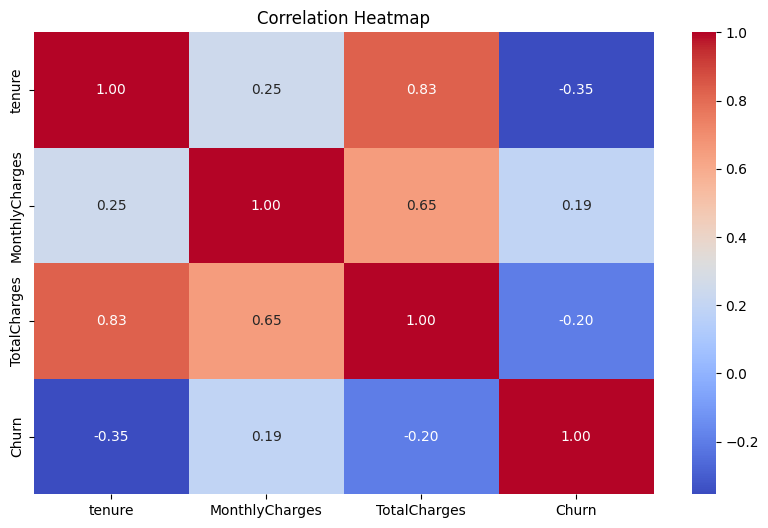

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##  Step 5: Train Models

In [10]:
# Prepare features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training samples: {X_train.shape[0]}')
print(f'Testing samples:  {X_test.shape[0]}')

Training samples: 5625
Testing samples:  1407


In [11]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_auc = cross_val_score(dt, X_scaled, y, cv=5, scoring='roc_auc').mean()
print(f'Decision Tree CV AUC:      {dt_auc:.4f}')

# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_auc = cross_val_score(gb, X_scaled, y, cv=5, scoring='roc_auc').mean()
print(f'Gradient Boosting CV AUC:  {gb_auc:.4f}')

print('\n Models trained!')

Decision Tree CV AUC:      0.6577
Gradient Boosting CV AUC:  0.8456

 Models trained!


## Step 6: Hyperparameter Tuning

In [12]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=1
)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print('\nBest Parameters:', grid_search.best_params_)
print(f'Best CV AUC: {grid_search.best_score_:.4f}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best CV AUC: 0.8471


## Step 7: Model Evaluation

In [13]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)

print('Classification Report:')
print(classification_report(y_test, y_pred))
print(f'ROC AUC Score: {auc:.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC Score: 0.8417


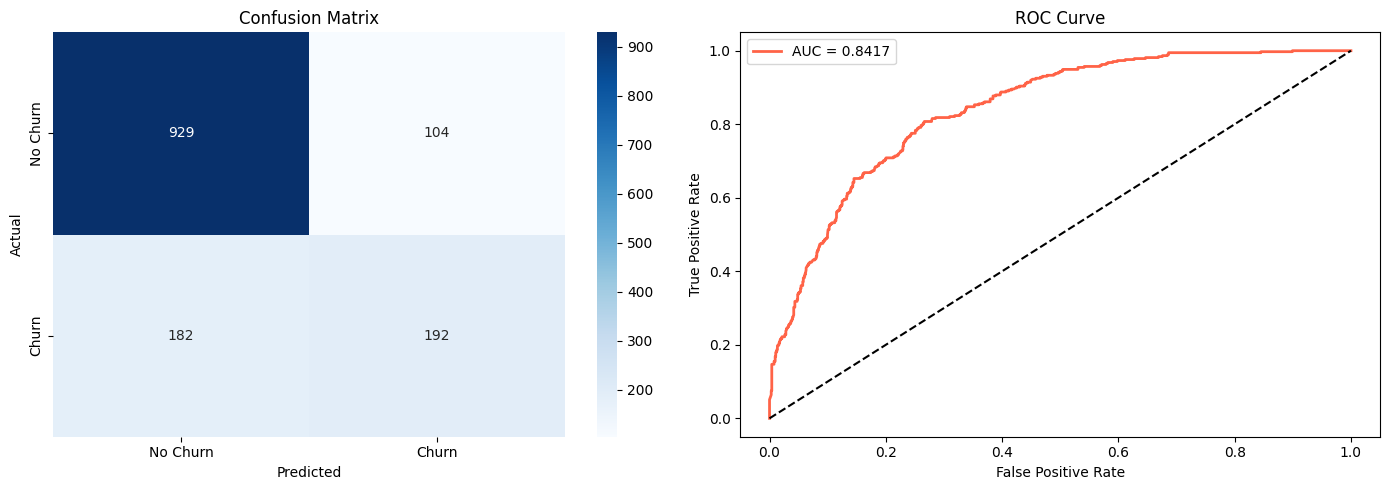

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
axes[1].plot(fpr, tpr, color='tomato', lw=2, label=f'AUC = {auc:.4f}')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title('ROC Curve')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].legend()

plt.tight_layout()
plt.show()

##  Step 8: Feature Importance

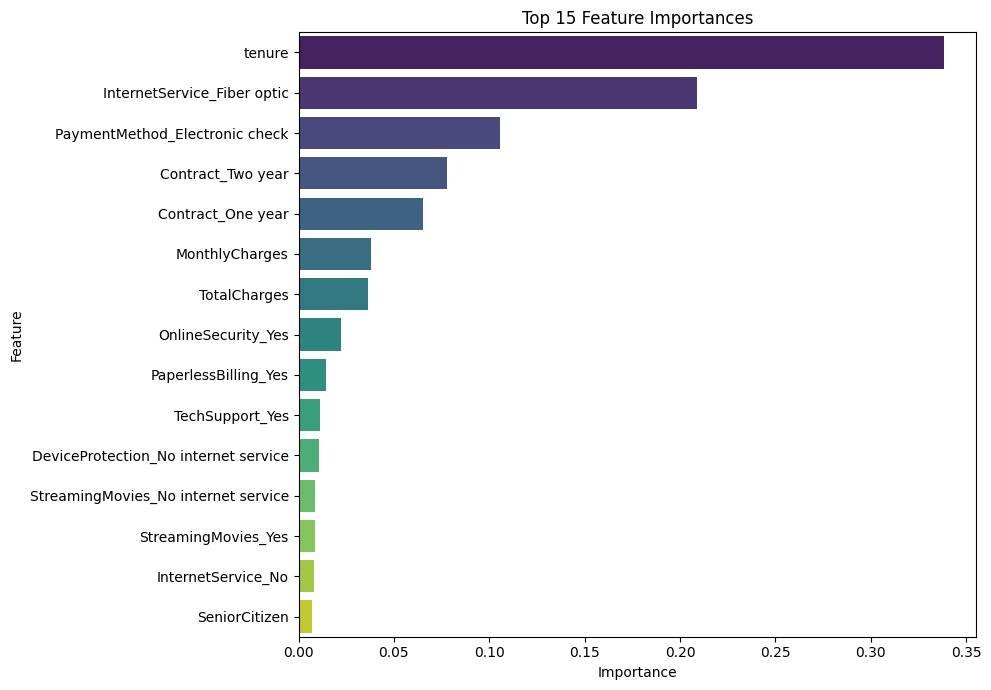


Top 5 Features:
                           Feature  Importance
1                           tenure    0.338476
10     InternetService_Fiber optic    0.208692
28  PaymentMethod_Electronic check    0.105851
25               Contract_Two year    0.077829
24               Contract_One year    0.065130


In [15]:
feature_names = X.columns.tolist()
importances = best_model.feature_importances_

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette='viridis')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

print('\nTop 5 Features:')
print(feat_df.head())

## Step 9: Predict a Single Customer

In [21]:
# Change customer_index to test different customers
customer_index = 0

customer = X_test[customer_index].reshape(1, -1)
prediction = best_model.predict(customer)[0]
probability = best_model.predict_proba(customer)[0][1]

print(f'Customer Index   : {customer_index}')
print(f'Prediction       : {"WILL CHURN" if prediction == 1 else "WILL NOT CHURN"}')
print(f'Churn Probability: {probability:.2%}')

Customer Index   : 0
Prediction       : WILL NOT CHURN
Churn Probability: 3.10%


## ✅ Conclusion

In this project we:
- Loaded and cleaned the Telco Churn dataset
- Performed Exploratory Data Analysis (EDA)
- Trained Decision Tree & Gradient Boosting models
- Tuned hyperparameters using GridSearchCV
- Evaluated model with Confusion Matrix & ROC Curve
- Visualized Top 15 Feature Importances
- Predicted churn for individual customers